In [28]:
from PIL import Image
import numpy as np
import scipy.io.wavfile as wav
import pyofdm.codec
import pyofdm.nyquistmodem
import matplotlib.pyplot as plt

In [29]:
# Number of total frequency samples
totalFreqSamples = 2048

# Number of useful data carriers / frequency samples
sym_slots = 1512

# QAM Order
QAMorder = 2

# Total number of bytes per OFDM symbol
nbytes = sym_slots * QAMorder // 8

# Distance of the evenly spaced pilots
distanceOfPilots = 12
pilotlist = pyofdm.codec.setpilotindex(nbytes, QAMorder, distanceOfPilots)

ofdm = pyofdm.codec.OFDM(pilotAmplitude=16/9, 
                         nData=nbytes, 
                         pilotIndices=pilotlist,
                         mQAM=QAMorder,
                         nFreqSamples=totalFreqSamples)

In [30]:
samp_rate, base_signal = wav.read("ofdm44100_reverb.wav")

# append some extra zeros to the base_signal
extra_pad_length = 60
base_signal = np.pad(base_signal, (0, extra_pad_length), "constant")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [31]:
complex_signal = pyofdm.nyquistmodem.demod(base_signal)

In [32]:
# find the start of the OFDM symbol
searchRangeForPilotPeak = 8
cc, sumofimag, offset = ofdm.findSymbolStartIndex(complex_signal, searchrangefine=searchRangeForPilotPeak)
print("Symbol start sample index =", offset)

Symbol start sample index = 2585


In [33]:
Nsig_sym = 159
ofdm.initDecode(complex_signal, 25)
rx_byte = np.uint8([ofdm.decode()[0] for i in range(Nsig_sym)]).ravel()
rx_byte = 255 - rx_byte

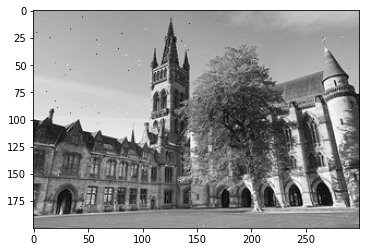

In [34]:
rx_byte = rx_byte[:60000].reshape(200, 300)
receive_img = Image.fromarray(rx_byte)
plt.imshow(receive_img, plt.cm.gray)

In [35]:
# calculate bit error ratio
origin_img = Image.open("DC4_300x200.pgm")
origin_img = np.array(origin_img)
ber = np.sum(origin_img != receive_img) / origin_img.size
print("Bit error ratio = ", ber)

Bit error ratio =  0.008783333333333334


In [36]:
def receive(wave_file):
    samp_rate, base_signal = wav.read(wave_file)
    # append some extra zeros to the base_signal
    extra_pad_length = 60
    base_signal = np.pad(base_signal, (0, extra_pad_length), "constant")
    complex_signal = pyofdm.nyquistmodem.demod(base_signal)
    
    Nsig_sym = 159
    ofdm.initDecode(complex_signal, 25)
    rx_byte = np.uint8([ofdm.decode()[0] for i in range(Nsig_sym)]).ravel()
    rx_byte = 255 - rx_byte
    
    rx_byte = rx_byte[:60000].reshape(200, 300)
    receive_img = Image.fromarray(rx_byte)
    plt.imshow(receive_img, plt.cm.gray)
    
    # calculate bit error ratio
    origin_img = Image.open("DC4_300x200.pgm")
    origin_img = np.array(origin_img)
    ber = np.sum(origin_img != receive_img) / origin_img.size
    print("Bit error ratio = ", ber)
    

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.008783333333333334


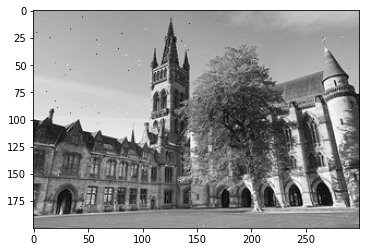

In [37]:
receive("ofdm44100_reverb.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.002916666666666667


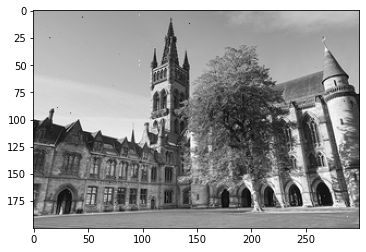

In [12]:
receive("ofdm44100_reverb_B20.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.02045


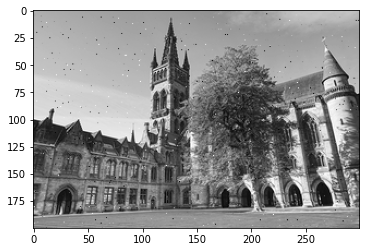

In [13]:
receive("ofdm44100_reverb_B80.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.013033333333333333


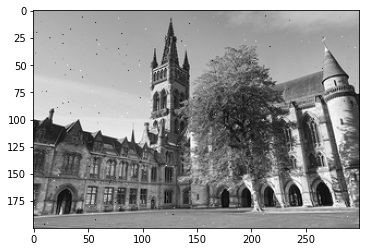

In [18]:
receive("ofdm44100_reverb_M20.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.00625


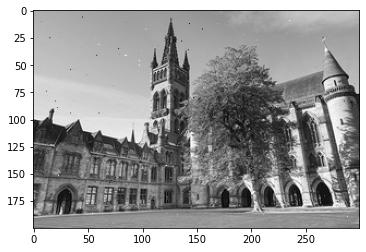

In [19]:
receive("ofdm44100_reverb_M80.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.9949833333333333


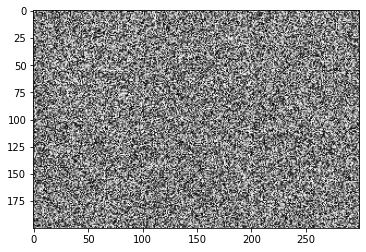

In [38]:
receive("ofdm44100_white_noise0.8.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.9379666666666666


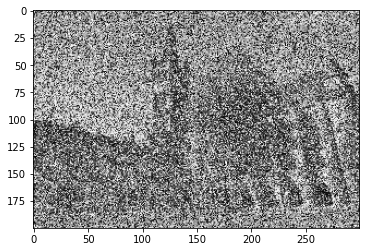

In [39]:
receive("ofdm44100_white_noise0.05.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.2511


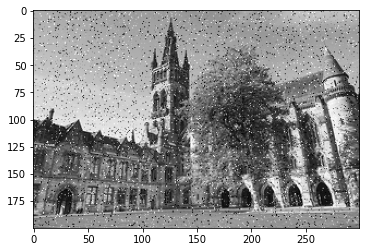

In [43]:
receive("ofdm44100_white_noise0.015.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.026133333333333335


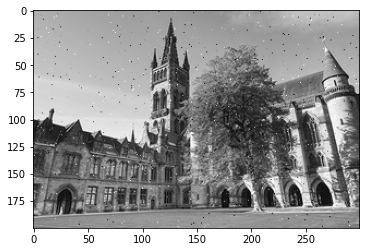

In [41]:
receive("ofdm44100_white_noise0.01.wav")

d:\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Bit error ratio =  0.0


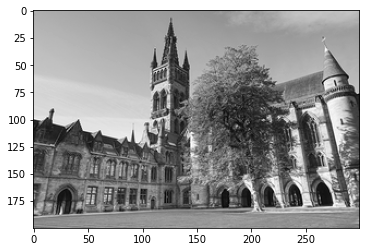

In [42]:
receive("ofdm44100_white_noise0.003.wav")